In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("Data - Sheet1.csv")

In [3]:
df["Voltage"]=df["Voltage"].fillna(9)

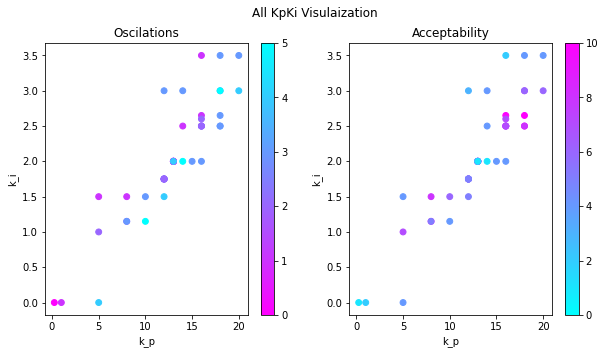

In [4]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.sca(axs[0])

cm=plt.get_cmap("cool_r")
pos=plt.scatter(df['k_p'],df['k_D'],c=df["Oscillations"].astype(int), 
            vmin=0, vmax=max(df["Oscillations"]), s=35, cmap=cm)

plt.xlabel('k_p')
plt.ylabel('k_i')
plt.title("Oscilations")
fig.colorbar(pos, ax=axs[0])
plt.sca(axs[1])
cm=plt.get_cmap("cool")

pos=plt.scatter(df['k_p'],df['k_D'],c=df["Acceptability"].astype(int), 
            vmin=0, vmax=max(df["Acceptability"]), s=35, cmap=cm)
plt.xlabel('k_p')
plt.ylabel('k_i')
plt.title("Acceptability")
fig.colorbar(pos, ax=axs[1])
fig.suptitle("All KpKi Visulaization")
plt.savefig("KpKiAll.png")

In [7]:
X=df[["k_p","k_D","Velocity","Voltage","Full Track"]].to_numpy()

In [8]:
pca = PCA(n_components=2)
X_transformed=pca.fit_transform(X)

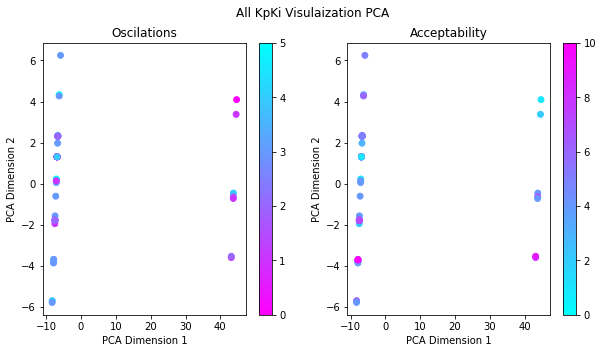

In [9]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.sca(axs[0])

cm=plt.get_cmap("cool_r")
pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Oscillations"].astype(int), 
            vmin=0, vmax=max(df["Oscillations"]), s=35, cmap=cm)

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title("Oscilations")
fig.colorbar(pos, ax=axs[0])
plt.sca(axs[1])
cm=plt.get_cmap("cool")

pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Acceptability"].astype(int), 
            vmin=0, vmax=max(df["Acceptability"]), s=35, cmap=cm)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title("Acceptability")
fig.colorbar(pos, ax=axs[1])
fig.suptitle("All KpKi Visulaization PCA")
plt.savefig("KpKiAllPCA.png")

Text(0.5, 0.98, 'All KpKi Visulaization PCA')

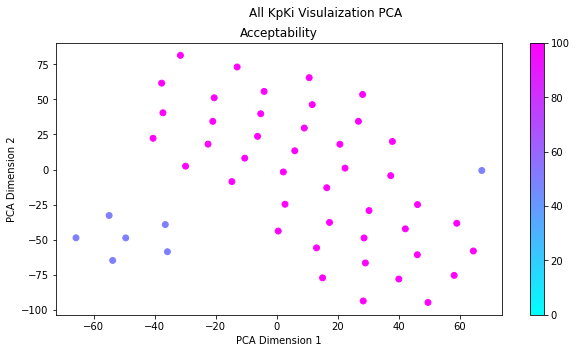

In [15]:

fig,axs=plt.subplots(1,1,figsize=(10,5))
cm=plt.get_cmap("cool")

pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Velocity"].astype(int), 
            vmin=0, vmax=max(df["Velocity"]), s=35, cmap=cm)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title("Acceptability")
fig.colorbar(pos, ax=axs)
fig.suptitle("All KpKi Visulaization PCA")

In [10]:
tsne=TSNE(n_components=2)
X_transformed=tsne.fit_transform(X)

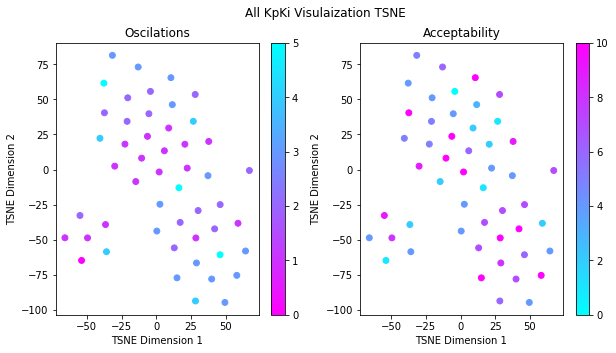

In [11]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.sca(axs[0])

cm=plt.get_cmap("cool_r")
pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Oscillations"].astype(int), 
            vmin=0, vmax=max(df["Oscillations"]), s=35, cmap=cm)

plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Oscilations")
fig.colorbar(pos, ax=axs[0])
plt.sca(axs[1])
cm=plt.get_cmap("cool")

pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Acceptability"].astype(int), 
            vmin=0, vmax=max(df["Acceptability"]), s=35, cmap=cm)
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Acceptability")
fig.colorbar(pos, ax=axs[1])
fig.suptitle("All KpKi Visulaization TSNE")
plt.savefig("KpKiAllTSNE.png")

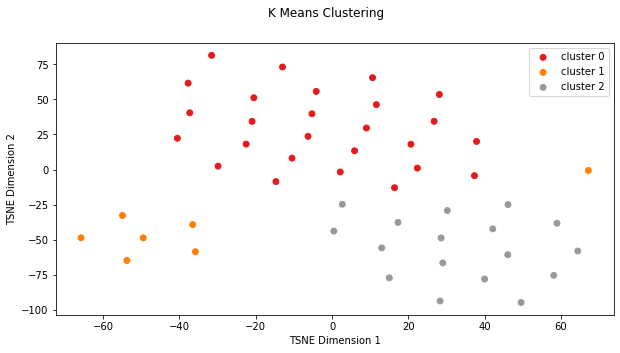

In [29]:
Predicted_clusters=KMeans(n_clusters=3).fit_predict(X)

fig,axs=plt.subplots(1,1,figsize=(10,5))
cm=plt.get_cmap('Set1')
for i in np.unique(Predicted_clusters):
    pos=plt.scatter(X_transformed[Predicted_clusters==i,0],
                X_transformed[Predicted_clusters==i,1],
                c=[i]*np.sum(Predicted_clusters==i), 
                vmin=0, vmax=max(Predicted_clusters), s=35, cmap=cm,
                label=f"cluster {i}")
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend()
fig.suptitle("K Means Clustering")
plt.savefig("KpKiAllTSNEKMeans.png")

In [114]:
indexs=np.arange(len(df))
np.random.shuffle(indexs)

train_test_split=0.8 # 80% train, 20% test

train_indexs=indexs[:int(train_test_split*len(indexs))]
test_indexs=indexs[int(train_test_split*len(indexs)):]

trainX=X[train_indexs]
trainYOscillations=df["Oscillations"].astype(int).to_numpy()[train_indexs]
trainYAceptability=df["Acceptability"].astype(int).to_numpy()[train_indexs]

testX=X[test_indexs]
testYOscillations=df["Oscillations"].astype(int).to_numpy()[test_indexs]
testYAceptability=df["Acceptability"].astype(int).to_numpy()[test_indexs]


In [115]:
regressor=LinearRegression()
regressor.fit(trainX,trainYOscillations)
regressor.score(testX,testYOscillations)

-0.30711424068491167

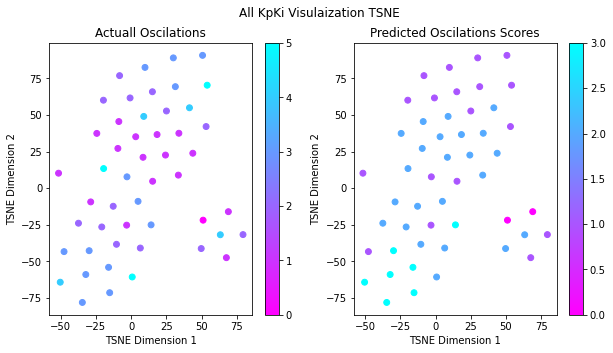

In [116]:
predictedOscillationScores=regressor.predict(X).astype(int)
predictedOscillationScores[predictedOscillationScores>5]=5
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.sca(axs[0])

cm=plt.get_cmap("cool_r")
pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Oscillations"].astype(int), 
            vmin=0, vmax=max(df["Oscillations"]), s=35, cmap=cm)

plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Actuall Oscilations")
fig.colorbar(pos, ax=axs[0])
plt.sca(axs[1])
cm=plt.get_cmap("cool_r")

pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=predictedOscillationScores.astype(int), 
            vmin=0, vmax=max(predictedOscillationScores), s=35, cmap=cm)
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Predicted Oscilations Scores")
fig.colorbar(pos, ax=axs[1])
fig.suptitle("All KpKi Visulaization TSNE")
plt.savefig("KpKiAllLinearOscillatorRegressor.png")

In [124]:
regressor=LinearRegression()
regressor.fit(trainX,trainYAceptability)
regressor.score(testX,testYAceptability)

0.10592037361784823

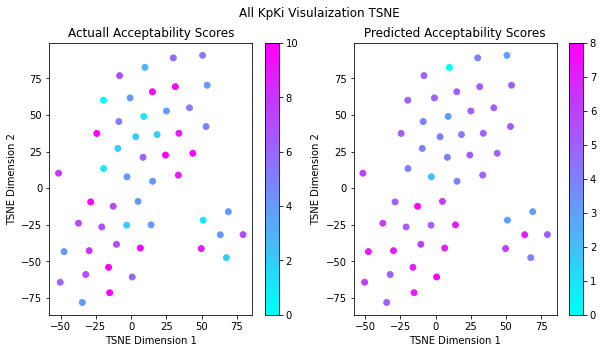

In [118]:
predictedAcceptabilityScores=regressor.predict(X).astype(int)
predictedAcceptabilityScores[predictedAcceptabilityScores>max(df["Acceptability"].astype(int))]=max(df["Acceptability"].astype(int))
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.sca(axs[0])

cm=plt.get_cmap("cool")
pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Acceptability"].astype(int), 
            vmin=0, vmax=max(df["Acceptability"]), s=35, cmap=cm)

plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Actuall Acceptability Scores")
fig.colorbar(pos, ax=axs[0])
plt.sca(axs[1])
cm=plt.get_cmap("cool")

pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=predictedAcceptabilityScores.astype(int), 
            vmin=0, vmax=max(predictedAcceptabilityScores), s=35, cmap=cm)
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Predicted Acceptability Scores")
fig.colorbar(pos, ax=axs[1])
fig.suptitle("All KpKi Visulaization TSNE")
plt.savefig("KpKiAllLinearAcceptabilityRegressor.png")

In [131]:
regressor=LogisticRegression(solver='liblinear',max_iter=100)
regressor.fit(trainX,trainYOscillations)

LogisticRegression(solver='liblinear')

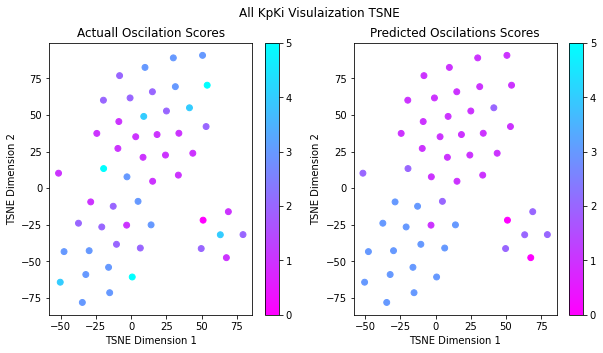

In [132]:
predictedOscillationScores=regressor.predict(X).astype(int)
predictedOscillationScores[predictedOscillationScores>5]=5
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.sca(axs[0])

cm=plt.get_cmap("cool_r")
pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Oscillations"].astype(int), 
            vmin=0, vmax=max(df["Oscillations"]), s=35, cmap=cm)

plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Actuall Oscilation Scores")
fig.colorbar(pos, ax=axs[0])
plt.sca(axs[1])
cm=plt.get_cmap("cool_r")

pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=predictedOscillationScores.astype(int), 
            vmin=0, vmax=max(df["Oscillations"]), s=35, cmap=cm)
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Predicted Oscilations Scores")
fig.colorbar(pos, ax=axs[1])
fig.suptitle("All KpKi Visulaization TSNE")
plt.savefig("KpKiAllLogisticOscillatorRegressor.png")

In [133]:
regressor=LogisticRegression(solver='liblinear',max_iter=200)
regressor.fit(trainX,trainYAceptability)

LogisticRegression(max_iter=200, solver='liblinear')

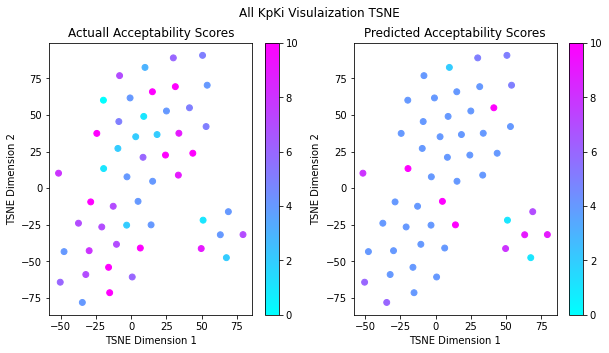

In [134]:
predictedAcceptabilityScores=regressor.predict(X).astype(int)
predictedAcceptabilityScores[predictedAcceptabilityScores>max(df["Acceptability"].astype(int))]=max(df["Acceptability"].astype(int))
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.sca(axs[0])

cm=plt.get_cmap("cool")
pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Acceptability"].astype(int), 
            vmin=0, vmax=max(df["Acceptability"]), s=35, cmap=cm)

plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Actuall Acceptability Scores")
fig.colorbar(pos, ax=axs[0])
plt.sca(axs[1])
cm=plt.get_cmap("cool")

pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=predictedAcceptabilityScores.astype(int), 
            vmin=0, vmax=max(predictedAcceptabilityScores), s=35, cmap=cm)
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Predicted Acceptability Scores")
fig.colorbar(pos, ax=axs[1])
fig.suptitle("All KpKi Visulaization TSNE")
plt.savefig("KpKiAllLogisticAcceptabilityRegressor.png")

# Binary Try

In [135]:
indexs=np.arange(len(df))
np.random.shuffle(indexs)

train_test_split=0.8 # 80% train, 20% test

train_indexs=indexs[:int(train_test_split*len(indexs))]
test_indexs=indexs[int(train_test_split*len(indexs)):]

YOscillations=df["Oscillations"].astype(int).to_numpy()>2.5
YAceptability=df["Acceptability"].astype(int).to_numpy()>5

trainX=X[train_indexs]
trainYOscillations=YOscillations[train_indexs]
trainYAceptability=YAceptability[train_indexs]

testX=X[test_indexs]
testYOscillations=YOscillations[test_indexs]
testYAceptability=YAceptability[test_indexs]

In [137]:
regressor=LogisticRegression(solver='liblinear',max_iter=200)
regressor.fit(trainX,trainYAceptability)
regressor.score(testX,testYAceptability)

0.5

In [ ]:
predictedAcceptabilityScores=regressor.predict(X).astype(int)
predictedAcceptabilityScores[predictedAcceptabilityScores>max(df["Acceptability"].astype(int))]=max(df["Acceptability"].astype(int))
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.sca(axs[0])

cm=plt.get_cmap("cool")
pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=df["Acceptability"].astype(int), 
            vmin=0, vmax=max(df["Acceptability"]), s=35, cmap=cm)

plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Actuall Acceptability Scores")
fig.colorbar(pos, ax=axs[0])
plt.sca(axs[1])
cm=plt.get_cmap("cool")

pos=plt.scatter(X_transformed[:,0],X_transformed[:,1],c=predictedAcceptabilityScores.astype(int), 
            vmin=0, vmax=max(predictedAcceptabilityScores), s=35, cmap=cm)
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title("Predicted Acceptability Scores")
fig.colorbar(pos, ax=axs[1])
fig.suptitle("All KpKi Visulaization TSNE")
plt.savefig("KpKiAllLogisticAcceptabilityRegressor.png")